# Assignment 21 Solutions

##### 1. What is the estimated depth of a Decision Tree trained (unrestricted) on a one million instance training set ?

In [ ]:
The depth of a well-balanced binary tree containing m leaves is equal to log2(m)3, rounded up. A binary Decision Tree (one that makes only binary decisions, as is the case of all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log2(106) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).

##### 2. Is the Gini impurity of a node usually lower or higher than that of its parent? Is it always lower/greater, or is it usually lower/greater ?

In [ ]:
A node’s Gini impurity is generally lower than its parent’s. This is ensured by the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, if one child is smaller than the other, it is possible for it to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease of the other child’s impurity. For example, consider a node containing four instances of class A and 1 of class B. Its Gini impurity is 1 − 1/5^2 − 4/5^2 = 0.32. Now suppose the dataset is one-dimensional and the instances are lined up in the following order: A, B, A, A, A. You can verify that the algorithm will split this node after the second instance, producing one child node with instances A, B, and the other child node with instances A, A, A. The first child node’s Gini impurity is 1 − 1/2^2 − 1/2^2 = 0.5, which is higher than its parent. This is compensated for by the fact that the other node is pure, so the overall weighted Gini impurity is 25 × 0.5 + 35 × 0 = 0.2 , which is lower than the parent’s Gini impurity.

##### 3. Explain if its a good idea to reduce max depth if a Decision Tree is overfitting the training set ?

In [ ]:
If a Decision Tree is overfitting the training set, it may be a good idea to decrease max_depth, since this will constrain the model, regularizing it

##### 4. Explain if its a  good idea to try scaling the input features if a Decision Tree underfits the training set ?

In [ ]:
Decision Trees don’t care whether or not the training data is scaled or centered; that’s one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

##### 5. How much time will it take to train another Decision Tree on a training set of 10 million instances if it takes an hour to train a Decision Tree on a training set with 1 million instances ?

In [ ]:
The computational complexity of training a Decision Tree is O(n × m log(m)). So if you multiply the training set size by 10, the training time will be multiplied by K = (n × 10m × log(10m)) / (n × m × log(m)) = 10 × log(10m) / log(m). If m = 106, then K ≈ 11.7, so you can expect the training time to be roughly 11.7 hours

##### 6. Will setting presort=True speed up training if your training set has 100,000 instances ?

In [ ]:
Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances. If it contains 100,000 instances, setting presort=True will considerably slow down training.

##### 7. Follow these steps to train and fine-tune a Decision Tree for the moons dataset:
1. To build a moons dataset, use make moons(n samples=10000, noise=0.4).
2. Divide the dataset into a training and a test collection with train test split().
3. To find good hyperparameters values for a DecisionTreeClassifier, use grid search with cross-validation (with the GridSearchCV class). Try different values for max leaf nodes.
4. Use these hyperparameters to train the model on the entire training set, and then assess its output on the test set. You can achieve an accuracy of 85 to 87 percent.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def plot_dataset(X, y, axes):
    plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",alpha = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",alpha = 0.2)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [11]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=21)

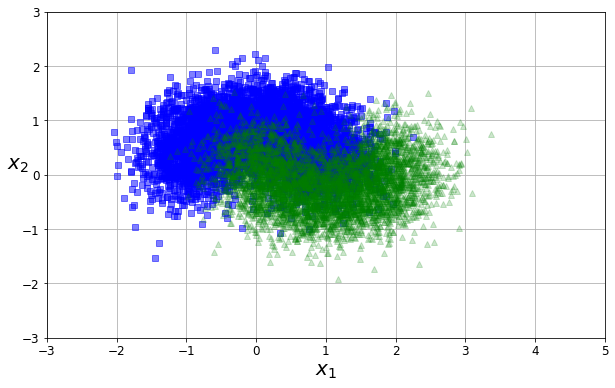

In [12]:
plot_dataset(X, y, [-3, 5, -3, 3])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import GridSearchCV

parameter = {
             'criterion' : ["gini", "entropy"],
             'max_leaf_nodes': list(range(2, 50)), 
             'min_samples_split': [2, 3, 4]
            }

In [16]:
clf = GridSearchCV(tree_clf, parameter, cv = 5,scoring = "accuracy",return_train_score=True,n_jobs=-1)

In [17]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [18]:
clf.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 31, 'min_samples_split': 2}

In [19]:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(mean_score, params)

0.7771874999999999 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.7771874999999999 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.7771874999999999 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.8181875 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8181875 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8181875 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8584687499999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8584687499999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.8584687499999999 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.8584687499999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8584687499999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.8584687499999999 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split'

In [20]:
clf.score(X_train, y_train)

0.86575

In [21]:
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_train)
confusion_matrix(y_train,pred)

array([[3521,  466],
       [ 608, 3405]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score

pre = precision_score(y_train, pred)
re  = recall_score(y_train, pred)
print(f"Precision: {pre}  Recall:{re}")

Precision: 0.8796176698527512  Recall:0.8484923997009718


In [23]:
from sklearn.metrics import f1_score

f1_score(y_train, pred)

0.8637747336377474

In [24]:
clf.score(X_test, y_test)

0.867

##### 8. Follow these steps to grow a forest:
1. Using the same method as before, create 1,000 subsets of the training set, each containing 100 instances chosen at random. You can do this with Scikit-ShuffleSplit Learn's class.
2. Using the best hyperparameter values found in the previous exercise, train one Decision Tree on each subset. On the test collection, evaluate these 1,000 Decision Trees. These Decision        Trees would likely perform worse than the first Decision Tree, achieving only around 80% accuracy, since they were trained on smaller sets.
3. Now the magic begins. Create 1,000 Decision Tree predictions for each test set case, and keep only the most common prediction (you can do this with SciPy's mode() function). Over the test collection, this method gives you majority-vote predictions.
4. On the test range, evaluate these predictions: you should achieve a slightly higher accuracy than the first model (approx 0.5 to 1.5 percent higher). You've successfully learned a Random Forest classifier!

In [25]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [30]:
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


0.7916765

In [35]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [36]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [37]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.863